In [15]:
import numpy as np
import pandas as pd

%matplotlib inline

from datetime import date,datetime,timedelta
from dateutil.parser import parse

import json
import re
from glob import glob

import seaborn as sns
import folium as g

import matplotlib.pyplot as plt
from matplotlib import rc
# 한글 폰트 문제 해결
rc('font', family='AppleGothic')
# 차트 축 <- 음수 부호 지원
plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError


In [4]:
# warning도 발생하지 않고 깔끔하게 설치가 잘 된거 같다
from konlpy.tag import Okt
okt = Okt()
text ='오늘 아침은 너무 일어나기 힘들군'
print(okt.morphs(text,stem=True))

['오늘', '아침', '은', '너무', '일어나다', '힘들다']


In [3]:
from wordcloud import WordCloud,STOPWORDS

In [7]:
from konlpy.tag import Kkma

In [8]:
kkma = Kkma()

### WordCloud 활용

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [27]:
txt = open('./Data/alice.txt').read()
txt

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

In [12]:
from PIL import Image

In [28]:
maskImg = np.array(Image.open('./Data/alice_mask.png'))
maskImg

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [40]:
# 불용어
sw = set(STOPWORDS)
sw.add('said')

In [41]:
wc = WordCloud(mask=maskImg,background_color='white',stopwords=sw)
wc = wc.generate(txt)

In [44]:
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

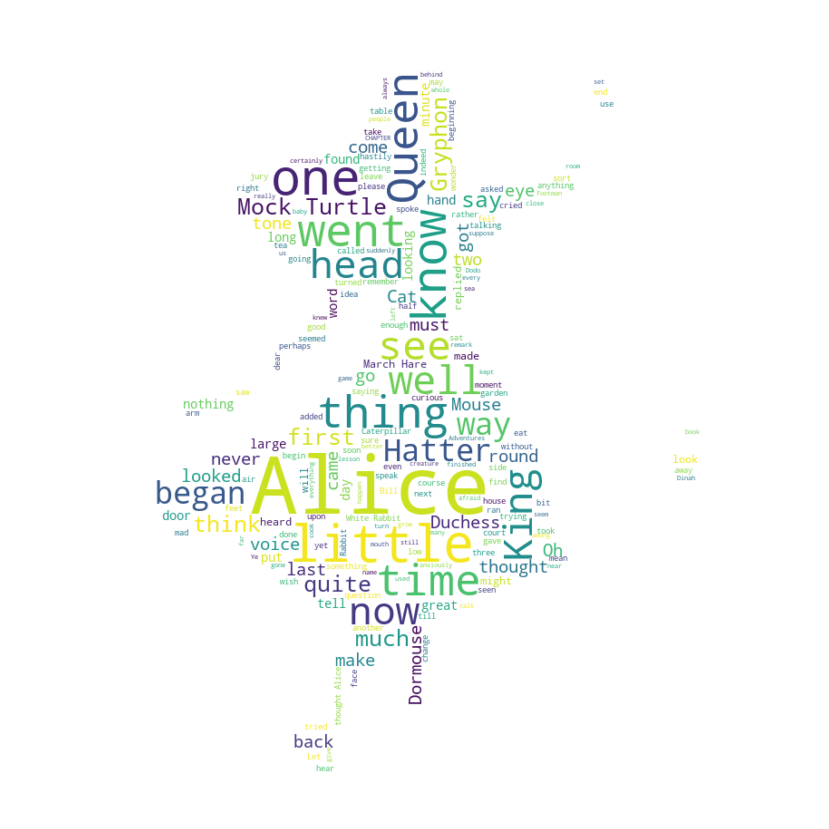

In [46]:
plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()
plt.close()

### 감성분석
- 리뷰문장 단어 중에서 good +0.1 awful -0.1 


In [ ]:
import nltk
from nltk.

In [47]:
try : 
    html = urlopen('https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser')

In [52]:
text = ''
for i in soup.find_all('div',{'class':'text show-more__control'}):
    text+=' '+i.get_text()
text

' Infinity war is one of the best MCU protects. It has a great story, great acting, and awesome looking. If you aren\'t a Marvel fan or haven\'t watched most of the previous MCU movies this however, won\'t be something for you. Let\'s start with Thanos, definitely one of the best villains, he has a motive, is well played, you can even say that Infinity war tells his story and not the story of a hero. But also most of the other cast members were great in their role and again, if you love Marvel, watch this movie. Avengers: Infinity War is a film that should be utter crap. A franchise stretching almost twenty films is unheard of. And making a great and satisfying climax to that franchise is nearly impossible. Considering how many characters Marvel had to juggle together with this movie, there was almost no way this movie wouldn\'t suck.But it didn\'t. Marvel pulled it off. All of the characters were balanced seemingly effortlessly. The action was amazing. The characters were funny. The s

In [54]:
from PIL import Image
maskImg = np.array(Image.open('./Data/stormtrooper_mask.png'))
maskImg

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [60]:
wc = WordCloud(mask=maskImg,background_color='white',stopwords=sw)
wc = wc.generate(text)

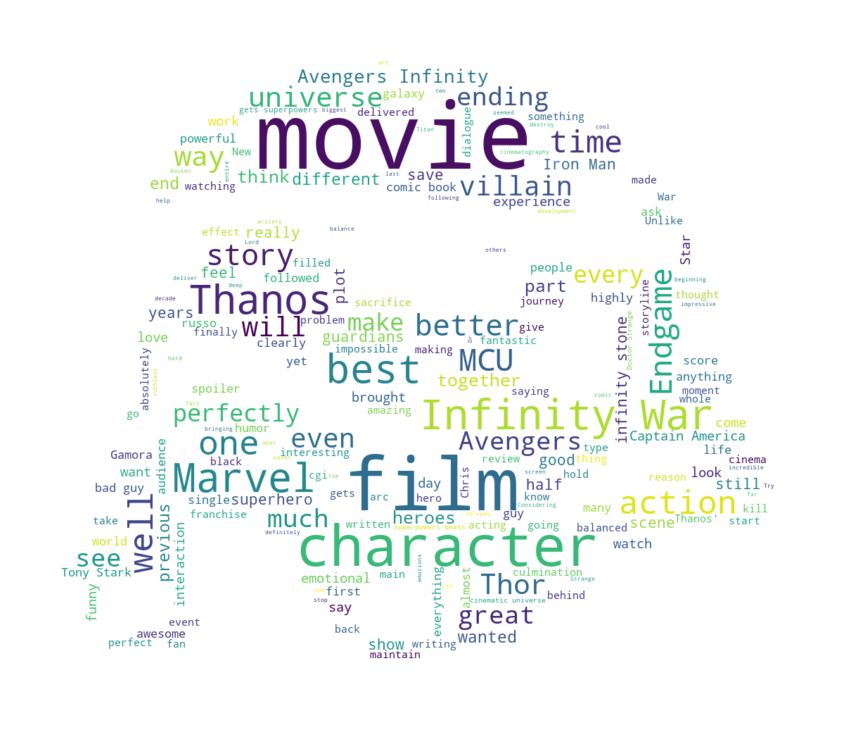

In [61]:
plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()
plt.close()

- 대한민국 헌법 kolaw
- 대한민구 국회법안

In [ ]:
from konlp.corpus import 